### STUDY OF THE SPATIAL RELATIONSHIP BETWEEN FOOD SOURCES AND HEALTH OUTCOMES IN THE US.

**This Jupyter Notebook is designed to analyze county-level health and socioeconomic data. It includes processes for data loading,
cleaning, merging, EDA, visualization, Hotspot Analysis using Getis Ord GI*, and in-depth modelling with Spatial Autocorrelation Regression
to provide insights that might inform public health decisions.

**Data Sources** :
**Health Outcomes** - https://nccd.cdc.gov/DHDSPAtlas/Default.aspx

**Food Sources** - https://www.ers.usda.gov/data-products/food-environment-atlas/documentation/

**County Boundaries** -  https://www.arcgis.com/home/item.html?id=f16090f6d3da48ec8f144a0771c8fec4
  

## Preprocessing Stage

In [2]:
# Import pandas for data manipulation
import pandas as pd

#saving the file paths 
# Adjust the path according to the location of your file in your folder
file_path = 'FoodEnvironmentAtlas.xlsx'

file_path2 = 'report 2009-2011.csv'
file_path3 = 'report 2014-2016.csv'
file_path4 = 'USA_Counties_boundary/USA_Counties.shp'

In [3]:
# Load data from Excel file into DataFrame
# Load data from each sheet
df_population = pd.read_excel(file_path, sheet_name = 'Supplemental Data - County')
df_access = pd.read_excel(file_path, sheet_name='ACCESS')
df_stores = pd.read_excel(file_path, sheet_name='STORES')
df_restaurants = pd.read_excel(file_path, sheet_name = 'RESTAURANTS')
df_health = pd.read_excel(file_path, sheet_name='HEALTH')
df_insecurity =  pd.read_excel(file_path, sheet_name =  'INSECURITY')
df_socioeconomic =  pd.read_excel(file_path, sheet_name =  'SOCIOECONOMIC')

In [4]:
# Display the first few rows of the DataFrame
df_population.head()

,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018
0,1001,Autauga County,Alabama,54571,55208,54936,54713,54876,54838,55242,55443,55601
1,1003,Baldwin County,Alabama,182265,186540,190143,194886,199189,202995,207712,212619,218022
2,1005,Barbour County,Alabama,27457,27350,27174,26944,26758,26294,25819,25158,24881
3,1007,Bibb County,Alabama,22915,22747,22664,22516,22541,22562,22576,22555,22400
4,1009,Blount County,Alabama,57322,57554,57570,57611,57521,57522,57517,57827,57840


In [5]:
# Processing step
#Initial Extracted Datasets Feature Selection
df_population_selected =  df_population[['FIPS', 'County','State', '2010_Census_Population', 'Population_Estimate_2012',
                                         'Population_Estimate_2013', 'Population_Estimate_2015',
                                         'Population_Estimate_2017', 'Population_Estimate_2018']]
df_access_selected = df_access[['FIPS', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15', 'PCT_LACCESS_LOWI10',
                                'PCT_LACCESS_LOWI15', 'PCT_LACCESS_CHILD10','PCT_LACCESS_CHILD15',
                                'PCT_LACCESS_SENIORS10','PCT_LACCESS_SENIORS15','PCT_LACCESS_WHITE15',
                                'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15','PCT_LACCESS_NHASIAN15','PCT_LACCESS_NHNA15',
                                'PCT_LACCESS_NHPI15', 'PCT_LACCESS_MULTIR15']]
df_stores_selected = df_stores[['FIPS', 'GROCPTH16', 'SUPERCPTH16']]
df_restaurants_selected = df_restaurants[['FIPS','FFRPTH11','FFRPTH16']]
df_health_selected = df_health[['FIPS', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS17','RECFACPTH11',
                                'RECFACPTH16','PCH_RECFACPTH_11_16']]
df_insecurity_selected = df_insecurity[['FIPS', 'FOODINSEC_12_14', 'FOODINSEC_15_17','VLFOODSEC_12_14',
                                        'VLFOODSEC_15_17']]
df_socioeconomic_selected = df_socioeconomic[['FIPS', 'PCT_NHWHITE10','PCT_NHBLACK10', 'PCT_HISP10','PCT_NHASIAN10',
                                              'PCT_NHNA10','PCT_NHPI10','PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
                                              'POVRATE15','PERPOV10','CHILDPOVRATE15','PERCHLDPOV10','METRO13','POPLOSS10']]

In [6]:
# Display the lengths of the selected dataframes to check for consistency

df_socioeconomic_selected.head()
print(len(df_socioeconomic_selected))
print(len(df_population_selected))
print(len(df_access_selected))
print(len(df_stores_selected))
print(len(df_restaurants_selected))
print(len(df_health_selected))
print(len(df_insecurity_selected))

3143
3142
3143
3143
3143
3143
3143


In [7]:
# Calculate the number of missing values in each column 
# Creating a function to check for missing values in all the dataframes
def details_df (df):
  len_df= len(df)
  missing_values = df.isnull().sum()
  duplicates = df.duplicated().sum()
  print(len_df, "\n", missing_values,"\n", duplicates)

In [8]:
#Creating a list of the initial selected dataframes 
dfs = [df_population_selected, df_access_selected, df_stores_selected, df_restaurants_selected, df_health_selected, df_insecurity_selected, df_socioeconomic_selected]

In [9]:
# Processing step
for df in dfs:
  details_df(df)


3142 
 FIPS                        0
County                      0
State                       0
2010_Census_Population      0
Population_Estimate_2012    0
Population_Estimate_2013    0
Population_Estimate_2015    0
Population_Estimate_2017    0
Population_Estimate_2018    0
dtype: int64 
 0
3143 
 FIPS                      0
PCT_LACCESS_POP10         0
PCT_LACCESS_POP15        19
PCT_LACCESS_LOWI10        0
PCT_LACCESS_LOWI15       20
PCT_LACCESS_CHILD10       0
PCT_LACCESS_CHILD15      19
PCT_LACCESS_SENIORS10     0
PCT_LACCESS_SENIORS15    19
PCT_LACCESS_WHITE15      19
PCT_LACCESS_BLACK15      19
PCT_LACCESS_HISP15       19
PCT_LACCESS_NHASIAN15    19
PCT_LACCESS_NHNA15       19
PCT_LACCESS_NHPI15       19
PCT_LACCESS_MULTIR15     19
dtype: int64 
 0
3143 
 FIPS           0
GROCPTH16      0
SUPERCPTH16    0
dtype: int64 
 0
3143 
 FIPS        0
FFRPTH11    0
FFRPTH16    0
dtype: int64 
 0
3143 
 FIPS                       0
PCT_DIABETES_ADULTS13      1
PCT_OBESE_ADULTS17         0

In [10]:
# Merge data frames on a key column (FIPS)
from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='inner'), dfs)

In [11]:
# Display the first few rows of the DataFrame
df_merged.head()

,FIPS,County,State,2010_Census_Population,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2015,Population_Estimate_2017,Population_Estimate_2018,PCT_LACCESS_POP10,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,1001,Autauga County,Alabama,54571,54936,54713,54838,55443,55601,33.769657,...,0.040314,11.995382,26.777959,56580.0,12.7,0,18.8,0,1,0.0
1,1003,Baldwin County,Alabama,182265,190143,194886,202995,212619,218022,19.318473,...,0.043343,16.771185,22.987408,52387.0,12.9,0,19.6,0,1,0.0
2,1005,Barbour County,Alabama,27457,27174,26944,26294,25158,24881,20.840972,...,0.087409,14.236807,21.906982,31433.0,32.0,1,45.2,1,0,0.0
3,1007,Bibb County,Alabama,22915,22664,22516,22562,22555,22400,4.559753,...,0.030548,12.681650,22.696923,40767.0,22.2,0,29.3,1,1,0.0
4,1009,Blount County,Alabama,57322,57570,57611,57522,57827,57840,2.700840,...,0.031402,14.722096,24.608353,50487.0,14.7,0,22.2,0,1,0.0


In [12]:
# Displaying the list columns in merged dataframe
df_merged.columns

Index(['FIPS', 'County', 'State', '2010_Census_Population',
       'Population_Estimate_2012', 'Population_Estimate_2013',
       'Population_Estimate_2015', 'Population_Estimate_2017',
       'Population_Estimate_2018', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_CHILD10',
       'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15',
       'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_HISP15',
       'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHPI15',
       'PCT_LACCESS_MULTIR15', 'GROCPTH16', 'SUPERCPTH16', 'FFRPTH11',
       'FFRPTH16', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS17',
       'RECFACPTH11', 'RECFACPTH16', 'PCH_RECFACPTH_11_16', 'FOODINSEC_12_14',
       'FOODINSEC_15_17', 'VLFOODSEC_12_14', 'VLFOODSEC_15_17',
       'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',
       'PCT_NHNA10', 'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10',
       'M

In [13]:
#Viewing the lenth of the merged columns
len(df_merged.columns)

52

In [14]:
# Load data from an Excel/CSV file into a DataFrame
df_cardiovascular_twenty_eleven =  pd.read_csv (file_path2, sep=',')
df_cardiovascular_twenty_sixteen =  pd.read_csv (file_path3, sep=',')


In [15]:
# Displaying a dataset
df_cardiovascular_twenty_eleven.head(5)

,cnty_fips,display_name,Value,theme_range
0,2013,"""Aleutians East, (AK)""",128.6,94 - 208 (643)
1,2016,"""Aleutians West, (AK)""",105.7,94 - 208 (643)
2,2020,"""Anchorage, (AK)""",193.9,94 - 208 (643)
3,2050,"""Bethel, (AK)""",272.9,260 - 294 (640)
4,2060,"""Bristol Bay, (AK)""",-1.0,NaN


In [16]:
# Changing column names and dropping irrelevant columns to match other  datasets
df_cardiovascular_twenty_eleven.rename(columns={"Value": "D_rate_per_100k_2011", "cnty_fips": "FIPS"}, inplace= True)
df_cardiovascular_twenty_sixteen.rename(columns={"Value": "D_rate_per_100k_2016", "cnty_fips": "FIPS"}, inplace= True)
df_cardiovascular_twenty_sixteen.drop(columns= ['display_name','theme_range'], inplace= True)
df_cardiovascular_twenty_eleven.drop(columns= ['display_name','theme_range'], inplace= True)


In [17]:
# Viewing table on death rates for 2016
df_cardiovascular_twenty_sixteen.head(5)

,FIPS,D_rate_per_100k_2016
0,2013,55.7
1,2016,91.0
2,2020,178.8
3,2050,259.2
4,2060,-1.0


In [18]:
# Viewing table on death rates for 2011
df_cardiovascular_twenty_eleven.head(5)


,FIPS,D_rate_per_100k_2011
0,2013,128.6
1,2016,105.7
2,2020,193.9
3,2050,272.9
4,2060,-1.0


In [19]:
# Creating a new list of dataframes to merge
new_dfs = [df_stores_selected, df_restaurants_selected, df_health_selected, df_cardiovascular_twenty_eleven, df_cardiovascular_twenty_sixteen]


In [20]:
# viewing the details on the dataframes in new list
for df in new_dfs:
  details_df(df)

3143 
 FIPS           0
GROCPTH16      0
SUPERCPTH16    0
dtype: int64 
 0
3143 
 FIPS        0
FFRPTH11    0
FFRPTH16    0
dtype: int64 
 0
3143 
 FIPS                       0
PCT_DIABETES_ADULTS13      1
PCT_OBESE_ADULTS17         0
RECFACPTH11                0
RECFACPTH16                0
PCH_RECFACPTH_11_16      143
dtype: int64 
 0
3219 
 FIPS                    0
D_rate_per_100k_2011    0
dtype: int64 
 0
3219 
 FIPS                    0
D_rate_per_100k_2016    0
dtype: int64 
 0


In [21]:
# Merge data frames on a key column (FIPS)
new_df_merged = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='inner'), new_dfs)

In [22]:
# View newly created dataframe
new_df_merged

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,PCH_RECFACPTH_11_16,D_rate_per_100k_2011,D_rate_per_100k_2016
0,1001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,49.785629,318.7,276.7
1,1003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,17.983256,278.1,237.9
2,1005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,-100.000000,376.3,286.1
3,1007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,NaN,333.6,299.4
4,1009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,33.333333,299.6,280.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,0.090406,0.022601,0.568014,0.700644,8.1,28.8,0.090882,0.135609,49.213470,233.3,236.7
3131,56039,0.474547,0.000000,1.257217,0.862813,4.8,28.8,0.419072,0.560828,33.826095,150.9,115.2
3132,56041,0.096567,0.048284,0.909134,0.820820,9.0,28.8,0.143548,0.096567,-32.728180,228.9,221.3
3133,56043,0.244260,0.000000,0.827423,0.732780,12.0,28.8,0.118203,0.122130,3.321935,216.5,201.7


In [23]:
# Finding columns with missing values
new_df_merged.isna().sum()

FIPS                       0
GROCPTH16                  0
SUPERCPTH16                0
FFRPTH11                   0
FFRPTH16                   0
PCT_DIABETES_ADULTS13      0
PCT_OBESE_ADULTS17         0
RECFACPTH11                0
RECFACPTH16                0
PCH_RECFACPTH_11_16      143
D_rate_per_100k_2011       0
D_rate_per_100k_2016       0
dtype: int64

In [24]:
# Dropping Irrelevant column
new_df_merged.drop(columns='PCH_RECFACPTH_11_16', axis=1, inplace=True)

In [25]:
# Display table
new_df_merged

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016
0,1001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,276.7
1,1003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,237.9
2,1005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,286.1
3,1007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,299.4
4,1009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,280.5
...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,0.090406,0.022601,0.568014,0.700644,8.1,28.8,0.090882,0.135609,233.3,236.7
3131,56039,0.474547,0.000000,1.257217,0.862813,4.8,28.8,0.419072,0.560828,150.9,115.2
3132,56041,0.096567,0.048284,0.909134,0.820820,9.0,28.8,0.143548,0.096567,228.9,221.3
3133,56043,0.244260,0.000000,0.827423,0.732780,12.0,28.8,0.118203,0.122130,216.5,201.7


In [26]:
# confirming removal
new_df_merged.isna().sum()

FIPS                     0
GROCPTH16                0
SUPERCPTH16              0
FFRPTH11                 0
FFRPTH16                 0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS17       0
RECFACPTH11              0
RECFACPTH16              0
D_rate_per_100k_2011     0
D_rate_per_100k_2016     0
dtype: int64

In [27]:
# Checking the column data types
print(new_df_merged.dtypes)

FIPS                       int64
GROCPTH16                float64
SUPERCPTH16              float64
FFRPTH11                 float64
FFRPTH16                 float64
PCT_DIABETES_ADULTS13    float64
PCT_OBESE_ADULTS17       float64
RECFACPTH11              float64
RECFACPTH16              float64
D_rate_per_100k_2011     float64
D_rate_per_100k_2016     float64
dtype: object


In [28]:
# reseting the index
new_df_merged.reset_index(drop=True, inplace=True)

In [29]:
# Merge data frames on a key column
# Checking for values less than or equal to zero in 'death rates column' which signify insufficient data for that 
# county (as provided in the documentation for the dataset)

filtered_rows = new_df_merged['D_rate_per_100k_2016'] <= 0

# Displaying rows where the condition is met
print(new_df_merged[filtered_rows])

    FIPS  GROCPTH16  SUPERCPTH16  FFRPTH11  FFRPTH16  PCT_DIABETES_ADULTS13  \
71  2060   2.209945          0.0       0.0       0.0                    8.5   
88  2282   3.267974          0.0       0.0       0.0                    7.9   

    PCT_OBESE_ADULTS17  RECFACPTH11  RECFACPTH16  D_rate_per_100k_2011  \
71                34.2          0.0          0.0                  -1.0   
88                34.2          0.0          0.0                  -1.0   

    D_rate_per_100k_2016  
71                  -1.0  
88                  -1.0  


In [30]:
#Showing the descriptive statistics on the datasets
new_df_merged.describe()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000
mean,30432.587879,0.244458,0.018301,0.561588,0.586314,11.242903,31.859043,0.071520,0.070479,253.178309,242.295152
std,15126.549936,0.216461,0.022470,0.300389,0.306671,2.479194,3.331794,0.073811,0.075843,51.565690,52.294156
min,1001.000000,0.000000,0.000000,0.000000,0.000000,3.300000,22.600000,0.000000,0.000000,-1.000000,-1.000000
25%,19002.000000,0.133277,0.000000,0.395844,0.419598,9.500000,30.100000,0.000000,0.000000,215.800000,205.000000
50%,29181.000000,0.186310,0.014684,0.562707,0.589196,11.100000,32.400000,0.065063,0.062082,246.700000,235.400000
75%,45082.000000,0.280071,0.029319,0.710199,0.748410,12.900000,33.800000,0.107179,0.108135,284.200000,274.800000
max,56045.000000,3.267974,0.250752,5.797101,5.805515,23.500000,38.100000,0.628141,1.053741,546.100000,621.200000


In [31]:
# Step 1: Filter out rows where 'death rates' values are less than or equal to zero
df_filtered = new_df_merged[(new_df_merged['D_rate_per_100k_2011'] > 0) & (new_df_merged['D_rate_per_100k_2016'] > 0)]

# Step 2: Reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

In [32]:
# Processing step
df_filtered.describe()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016
count,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000,3133.000000
mean,30450.629109,0.242865,0.018313,0.561947,0.586689,11.244845,31.857549,0.071565,0.070524,253.340568,242.450463
std,15114.504808,0.206713,0.022473,0.300149,0.306411,2.478780,3.332332,0.073813,0.075846,51.180428,51.948074
min,1001.000000,0.000000,0.000000,0.000000,0.000000,3.300000,22.600000,0.000000,0.000000,93.700000,55.700000
25%,19005.000000,0.133209,0.000000,0.396092,0.419703,9.500000,30.100000,0.000000,0.000000,215.900000,205.000000
50%,29183.000000,0.186182,0.014719,0.563595,0.589275,11.100000,32.400000,0.065066,0.062106,246.800000,235.400000
75%,45083.000000,0.279955,0.029346,0.710290,0.748481,12.900000,33.800000,0.107189,0.108155,284.200000,274.800000
max,56045.000000,2.541296,0.250752,5.797101,5.805515,23.500000,38.100000,0.628141,1.053741,546.100000,621.200000


In [33]:
# Installing Geopandas
!pip install geopandas

In [34]:
import geopandas as gpd

# Load the shapefile (for county boundaries)
gdf_counties = gpd.read_file(file_path4)

import geopandas as gpd

# Display the data types of all columns
print(gdf_counties.dtypes)



NAME            object
STATE_NAME      object
STATE_FIPS      object
CNTY_FIPS       object
FIPS            object
POPULATION       int64
POP_SQMI       float64
POP2010          int64
POP10_SQMI     float64
WHITE            int64
BLACK            int64
AMERI_ES         int64
ASIAN            int64
HAWN_PI          int64
HISPANIC         int64
OTHER            int64
MULT_RACE        int64
MALES            int64
FEMALES          int64
AGE_UNDER5       int64
AGE_5_9          int64
AGE_10_14        int64
AGE_15_19        int64
AGE_20_24        int64
AGE_25_34        int64
AGE_35_44        int64
AGE_45_54        int64
AGE_55_64        int64
AGE_65_74        int64
AGE_75_84        int64
AGE_85_UP        int64
MED_AGE        float64
MED_AGE_M      float64
MED_AGE_F      float64
HOUSEHOLDS       int64
AVE_HH_SZ      float64
HSEHLD_1_M       int64
HSEHLD_1_F       int64
MARHH_CHD        int64
MARHH_NO_C       int64
MHH_CHILD        int64
FHH_CHILD        int64
FAMILIES         int64
AVE_FAM_SZ 

In [35]:
# Display the first few rows of the DataFrame
gdf_counties.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POPULATION,POP_SQMI,POP2010,POP10_SQMI,WHITE,...,CROP_ACR12,AVE_SALE12,SQMI,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,Shape_Leng,Shape_Area,geometry
0,Autauga County,Alabama,01,001,01001,58224,96.3,54571,90.3,42855,...,41293.0,50929.0,604.37,371.0,305.0,36890.0,57844.0,2.066033,0.150256,"POLYGON ((-9619464.597 3856529.258, -9619451.3..."
1,Baldwin County,Alabama,01,003,01003,227660,139.4,182265,111.1,156153,...,100901.0,137069.0,1633.14,842.0,208.0,110438.0,142972.0,9.305629,0.398404,"MULTIPOLYGON (((-9747680.970 3539801.334, -974..."
2,Barbour County,Alabama,01,005,01005,26326,29.1,27457,30.4,13180,...,41301.0,182761.0,904.52,498.0,307.0,37304.0,211977.0,2.695260,0.223270,"POLYGON ((-9490859.154 3782745.368, -9490934.1..."
3,Bibb County,Alabama,01,007,01007,23066,36.8,22915,36.6,17381,...,12608.0,0.0,626.17,205.0,273.0,15823.0,20484.0,1.887519,0.156473,"POLYGON ((-9692114.170 3928123.612, -9692005.6..."
4,Blount County,Alabama,01,009,01009,59970,92.2,57322,88.1,53068,...,37147.0,143586.0,650.63,1146.0,129.0,43793.0,211916.0,2.423466,0.164405,"POLYGON ((-9623906.701 4063676.211, -9623890.4..."


In [36]:
#Formatting the FIPS column on filtered dataframe to match with geodataframe version for easy merge (adding a leading zero and ensuring its a string)
df_filtered.loc[:, 'FIPS'] = df_filtered['FIPS'].astype(str).str.zfill(5)


In [37]:
# Display the first few rows of the DataFrame
df_filtered.head()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,276.7
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,237.9
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,286.1
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,299.4
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,280.5


In [38]:
# Display the first few FIPS rows of the DataFrame
print(df_filtered['FIPS'].head())


0    01001
1    01003
2    01005
3    01007
4    01009
Name: FIPS, dtype: object


In [39]:
# Check the length of geodataframe
len(gdf_counties)

3143

In [40]:
# Check the length of filtered dataframe
len(df_filtered)

3133

In [41]:
# Convert FIPS codes in both datasets to sets
fips_df_filtered = set(df_filtered['FIPS'])
fips_gdf_counties = set(gdf_counties['FIPS'])

# Find FIPS codes unique to df_filtered
unique_df_filtered = fips_df_filtered - fips_gdf_counties

# Find FIPS codes unique to gdf_counties
unique_gdf_counties = fips_gdf_counties - fips_df_filtered

print("Unique to df_filtered:", unique_df_filtered)
print("Unique to gdf_counties:", unique_gdf_counties)

Unique to df_filtered: {'02261'}
Unique to gdf_counties: {'02275', '02230', '02198', '46102', '02158', '02066', '02063', '02282', '02105', '02060', '02195'}


In [42]:
# Processing step
gdf_filtered = gdf_counties[['NAME', 'STATE_NAME', 'FIPS', 'geometry']].copy()


In [43]:
# checking the data type for the NAME column
print(gdf_filtered.NAME.dtype)

object


In [44]:
# Display the first few rows of the DataFrame
gdf_filtered.head()

,NAME,STATE_NAME,FIPS,geometry
0,Autauga County,Alabama,01001,"POLYGON ((-9619464.597 3856529.258, -9619451.3..."
1,Baldwin County,Alabama,01003,"MULTIPOLYGON (((-9747680.970 3539801.334, -974..."
2,Barbour County,Alabama,01005,"POLYGON ((-9490859.154 3782745.368, -9490934.1..."
3,Bibb County,Alabama,01007,"POLYGON ((-9692114.170 3928123.612, -9692005.6..."
4,Blount County,Alabama,01009,"POLYGON ((-9623906.701 4063676.211, -9623890.4..."


In [45]:
# Merge data frames on the FIPS column
merged_gdf = df_filtered.merge(gdf_filtered, on='FIPS', how='inner')


In [46]:
# Display the first few rows of the DataFrame to inspect data
merged_gdf.head()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016,NAME,STATE_NAME,geometry
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,276.7,Autauga County,Alabama,"POLYGON ((-9619464.597 3856529.258, -9619451.3..."
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,237.9,Baldwin County,Alabama,"MULTIPOLYGON (((-9747680.970 3539801.334, -974..."
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,286.1,Barbour County,Alabama,"POLYGON ((-9490859.154 3782745.368, -9490934.1..."
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,299.4,Bibb County,Alabama,"POLYGON ((-9692114.170 3928123.612, -9692005.6..."
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,280.5,Blount County,Alabama,"POLYGON ((-9623906.701 4063676.211, -9623890.4..."


### Exploratory Data Analysis

In [47]:
# Checking for missing values
merged_gdf.isna().sum()

FIPS                     0
GROCPTH16                0
SUPERCPTH16              0
FFRPTH11                 0
FFRPTH16                 0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS17       0
RECFACPTH11              0
RECFACPTH16              0
D_rate_per_100k_2011     0
D_rate_per_100k_2016     0
NAME                     0
STATE_NAME               0
geometry                 0
dtype: int64

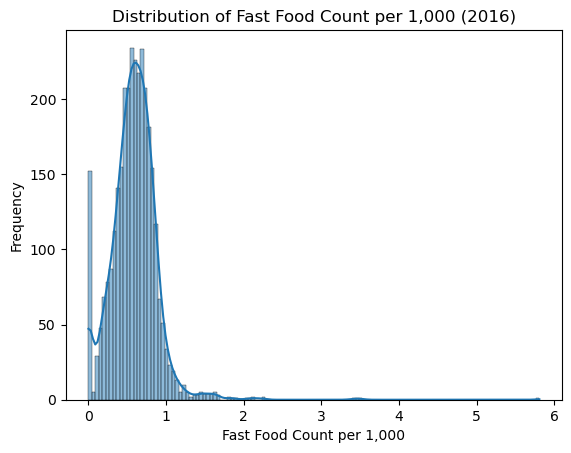

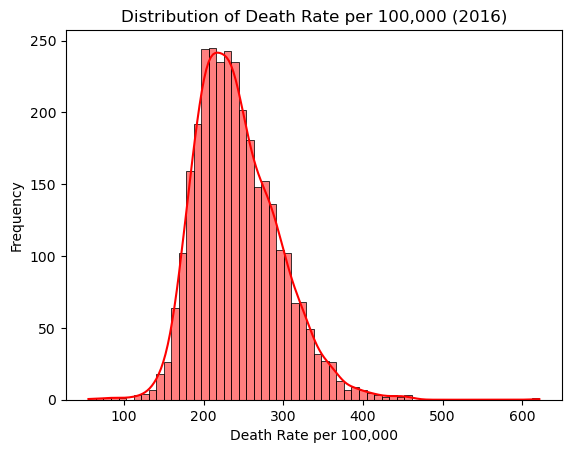

In [48]:
#Importing neccesary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Fast Food Count per 1,000
sns.histplot(merged_gdf['FFRPTH16'], kde=True)
plt.title('Distribution of Fast Food Count per 1,000 (2016)')
plt.xlabel('Fast Food Count per 1,000')
plt.ylabel('Frequency')
plt.show()

# Histogram for Death Rate per 100,000
sns.histplot(merged_gdf['D_rate_per_100k_2016'], kde=True, color='red')
plt.title('Distribution of Death Rate per 100,000 (2016)')
plt.xlabel('Death Rate per 100,000')
plt.ylabel('Frequency')
plt.show()

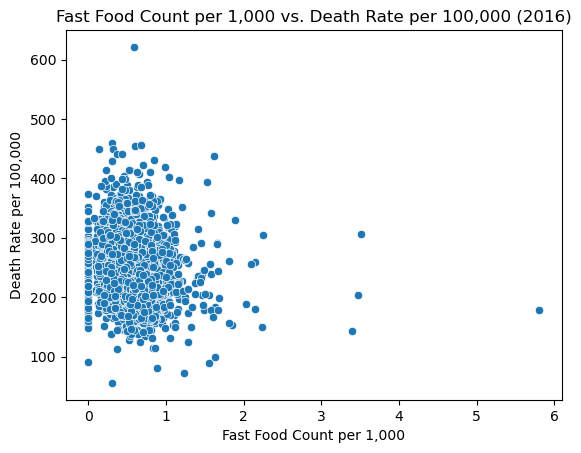

In [49]:
# Plotting a Scatter for Fast-food counts and Death Rates
sns.scatterplot(x='FFRPTH16', y='D_rate_per_100k_2016', data= merged_gdf)
plt.title('Fast Food Count per 1,000 vs. Death Rate per 100,000 (2016)')
plt.xlabel('Fast Food Count per 1,000')
plt.ylabel('Death Rate per 100,000')
plt.show()

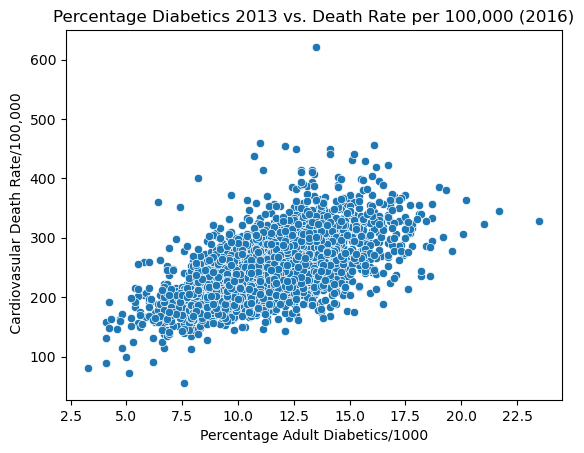

In [50]:
# Plotting a Scatter for Fast-food counts and Death Rates
sns.scatterplot(x='PCT_DIABETES_ADULTS13', y='D_rate_per_100k_2016', data= merged_gdf)
plt.title('Percentage Diabetics 2013 vs. Death Rate per 100,000 (2016)')
plt.xlabel('Percentage Adult Diabetics/1000')
plt.ylabel(' Cardiovasular Death Rate/100,000')
plt.show()

In [51]:
# Installing required library
!pip install folium


In [52]:
# Checking the dataframe's datatype
type(merged_gdf)


pandas.core.frame.DataFrame

In [53]:
# converting dataframe to geodataframe
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')


In [54]:
# Checking the CRS of the geodataframe
merged_gdf.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:

# Display the first few rows of the DataFrame to inspect data
merged_gdf.head()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016,NAME,STATE_NAME,geometry
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,276.7,Autauga County,Alabama,"POLYGON ((-9619464.597 3856529.258, -9619451.3..."
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,237.9,Baldwin County,Alabama,"MULTIPOLYGON (((-9747680.970 3539801.334, -974..."
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,286.1,Barbour County,Alabama,"POLYGON ((-9490859.154 3782745.368, -9490934.1..."
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,299.4,Bibb County,Alabama,"POLYGON ((-9692114.170 3928123.612, -9692005.6..."
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,280.5,Blount County,Alabama,"POLYGON ((-9623906.701 4063676.211, -9623890.4..."


In [56]:
# Convert the GeoDataFrame 'gdf' from EPSG:3857 to EPSG:4326
merged_gdf = merged_gdf.to_crs(epsg=4326)

# Now checking if the CRS was converted successfully
print(merged_gdf.crs)

EPSG:4326


In [57]:
# Display the first few rows of the DataFrame to inspect data
merged_gdf.head()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,D_rate_per_100k_2016,NAME,STATE_NAME,geometry
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,276.7,Autauga County,Alabama,"POLYGON ((-86.41312 32.70739, -86.41300 32.678..."
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,237.9,Baldwin County,Alabama,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ..."
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,286.1,Barbour County,Alabama,"POLYGON ((-85.25784 32.14794, -85.25851 32.146..."
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,299.4,Bibb County,Alabama,"POLYGON ((-87.06574 33.24691, -87.06477 33.246..."
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,280.5,Blount County,Alabama,"POLYGON ((-86.45302 34.25932, -86.45288 34.259..."


C:\Users\Maze\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Pair Plot of Fast Food Count and Death Rate')

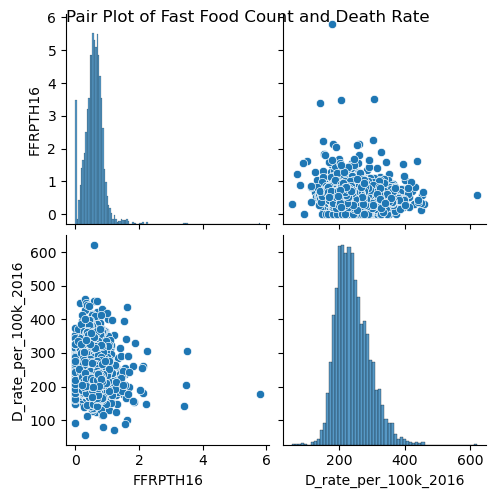

In [58]:
# Creating a pair plot
sns.pairplot(merged_gdf[['FFRPTH16', 'D_rate_per_100k_2016']])
plt.suptitle('Pair Plot of Fast Food Count and Death Rate')


In [59]:
# Pearson Correlation Coefficient
correlation = merged_gdf[['FFRPTH16', 'D_rate_per_100k_2016']].corr()
print("Pearson Correlation Coefficient:\n", correlation)

Pearson Correlation Coefficient:
                       FFRPTH16  D_rate_per_100k_2016
FFRPTH16              1.000000             -0.051524
D_rate_per_100k_2016 -0.051524              1.000000


In [60]:
# Installing a neccesary library for Moran's I
!pip install esda

In [61]:
#Importing the required library
from esda.moran import Moran
from libpysal.weights import Queen

# Calculate spatial weights based on queen contiguity
w = Queen.from_dataframe(merged_gdf)
w.transform = 'r'  # Row-standardize the weights


C:\Users\Maze\AppData\Local\Temp\ipykernel_28772\721518858.py:6: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_gdf)


('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 537, ' is an island (no neighbors)')
('WARNING: ', 538, ' is an island (no neighbors)')
('WARNING: ', 540, ' is an island (no neighbors)')
('WARNING: ', 1211, ' is an island (no neighbors)')
('WARNING: ', 1217, ' is an island (no neighbors)')
('WARNING: ', 2970, ' is an island (no neighbors)')


C:\Users\Maze\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 68, 77, 84, 537, 538, 540, 1211, 1217, 2970.
  W.__init__(self, neighbors, ids=ids, **kw)


In [62]:
# Moran's I for fast food count per 1,000 population
mi_ffcpth = Moran(merged_gdf['FFRPTH11'], w)
print(f"Moran's I for Fast Food Count per 1,000: {mi_ffcpth.I}, p-value: {mi_ffcpth.p_sim}")

# Moran's I for death rate per 100,000 population
mi_death_rate = Moran(merged_gdf['D_rate_per_100k_2016'], w)
print(f"Moran's I for Death Rate Per 100,000: {mi_death_rate.I}, p-value: {mi_death_rate.p_sim}")

Moran's I for Fast Food Count per 1,000: 0.07751380408327553, p-value: 0.001
Moran's I for Death Rate Per 100,000: 0.6916262519566444, p-value: 0.001


In [63]:
# Viewing columns
merged_gdf.columns

Index(['FIPS', 'GROCPTH16', 'SUPERCPTH16', 'FFRPTH11', 'FFRPTH16',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS17', 'RECFACPTH11',
       'RECFACPTH16', 'D_rate_per_100k_2011', 'D_rate_per_100k_2016', 'NAME',
       'STATE_NAME', 'geometry'],
      dtype='object')

In [64]:
# adding a new dataset
file_path_5 = 'DiabetesAtlasData (2).csv'

In [65]:
# Load data from an Excel/CSV file into a DataFrame
df_diabetes2014_raw = pd.read_csv(file_path_5, sep=',')

In [66]:
# Extracting features
df_diabetes2014 = df_diabetes2014_raw[['FIPS', 'Urban_Rural', 'Obesity-2014-Percentage']]

In [67]:
#Viewing the type of the Urban_Rural column
df_diabetes2014.Urban_Rural.dtype

dtype('O')

In [68]:
# Processing step
print(df_diabetes2014.FIPS.dtypes)

object


In [69]:

# Load data from Excel file into DataFrame
df_local =  pd.read_excel(file_path, sheet_name =  'LOCAL')
df_assistance =  pd.read_excel(file_path, sheet_name =  'ASSISTANCE')


In [70]:
# Extracting more features
df_local_selected = df_local[['FIPS','FMRKTPTH13']]
df_assistance_selected = df_assistance[['FIPS','PC_SNAPBEN12']] 
df_stores_2 = df_stores[['FIPS','GROCPTH11','SPECSPTH11']]
df_socioeconomic_selected2 = df_socioeconomic[['FIPS','PCT_65OLDER10',
                                              'POVRATE15']]

In [71]:
# Convert the FIPS column to string and then perform the operations
df_local_selected.loc[:,'FIPS'] = df_local_selected['FIPS'].astype(str).str.split('.').str[0].str.zfill(5)
df_assistance_selected.loc[:,'FIPS'] = df_assistance_selected['FIPS'].astype(str).str.split('.').str[0].str.zfill(5)
df_stores_2.loc[:,'FIPS'] = df_stores_2['FIPS'].astype(str).str.split('.').str[0].str.zfill(5)
df_socioeconomic_selected2.loc[:,'FIPS'] = df_socioeconomic_selected2['FIPS'].astype(str).str.split('.').str[0].str.zfill(5)

In [72]:
# Processing step
# Example for one DataFrame, repeat for others as necessary
# df_local_selected.loc[:,'FIPS'] = df_local_selected['FIPS'].str.split('.').str[0].str.zfill(5)
# df_assistance_selected.loc[:,'FIPS'] = df_assistance_selected['FIPS'].str.split('.').str[0].str.zfill(5)
# df_stores_2.loc[:,'FIPS'] = df_stores_2['FIPS'].str.split('.').str[0].str.zfill(5)


In [73]:
# creating a list for new merge
dfs_set = [merged_gdf, df_diabetes2014, df_local_selected, df_assistance_selected, df_stores_2,df_socioeconomic_selected2]

In [74]:
# Processing step
# Step 1: Inspect the 'FIPS' column in each dataframe
# for i, df in enumerate(dfs_set):
#     print(f"Dataframe {i+1} unique 'FIPS' values:")
#     print(df['FIPS'].unique())
#     print("\n")


In [75]:
# Processing step
# Step 2: Check the data types of the 'FIPS' column
# for i, df in enumerate(dfs_set):
#     print(f"Dataframe {i+1} 'FIPS' column data type:")
#     print(df['FIPS'].dtype)
#     print("\n")

In [76]:
# Merge data frames on a FIPS column
from functools import reduce
new_merged_gdf = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='inner'), dfs_set)

In [77]:
# Display the first few rows of the DataFrame to inspect data
new_merged_gdf.head()

,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,...,STATE_NAME,geometry,Urban_Rural,Obesity-2014-Percentage,FMRKTPTH13,PC_SNAPBEN12,GROCPTH11,SPECSPTH11,PCT_65OLDER10,POVRATE15
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,...,Alabama,"POLYGON ((-86.41312 32.70739, -86.41300 32.678...",Urban,30.4,0.018277,18.471487,0.090581,0.018116,11.995382,12.7
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,...,Alabama,"MULTIPOLYGON (((-87.56491 30.28162, -87.56470 ...",Urban,26.3,0.020525,15.890722,0.144746,0.107219,16.771185,12.9
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,...,Alabama,"POLYGON ((-85.25784 32.14794, -85.25851 32.146...",Rural,37.5,0.111342,31.116222,0.219370,0.109685,14.236807,32.0
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,...,Alabama,"POLYGON ((-87.06574 33.24691, -87.06477 33.246...",Urban,30.5,0.044413,22.435049,0.263794,0.000000,12.681650,22.2
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,...,Alabama,"POLYGON ((-86.45302 34.25932, -86.45288 34.259...",Urban,30.1,0.017358,20.272305,0.121608,0.017373,14.722096,14.7


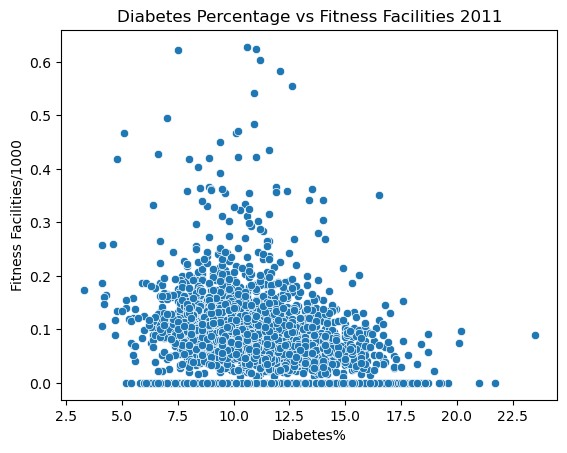

In [78]:
# Merge data frames on a key column
sns.scatterplot(x='PCT_DIABETES_ADULTS13', y='RECFACPTH11', data= new_merged_gdf)
plt.title('Diabetes Percentage vs Fitness Facilities 2011')
plt.xlabel('Diabetes%')
plt.ylabel('Fitness Facilities/1000')
plt.show()

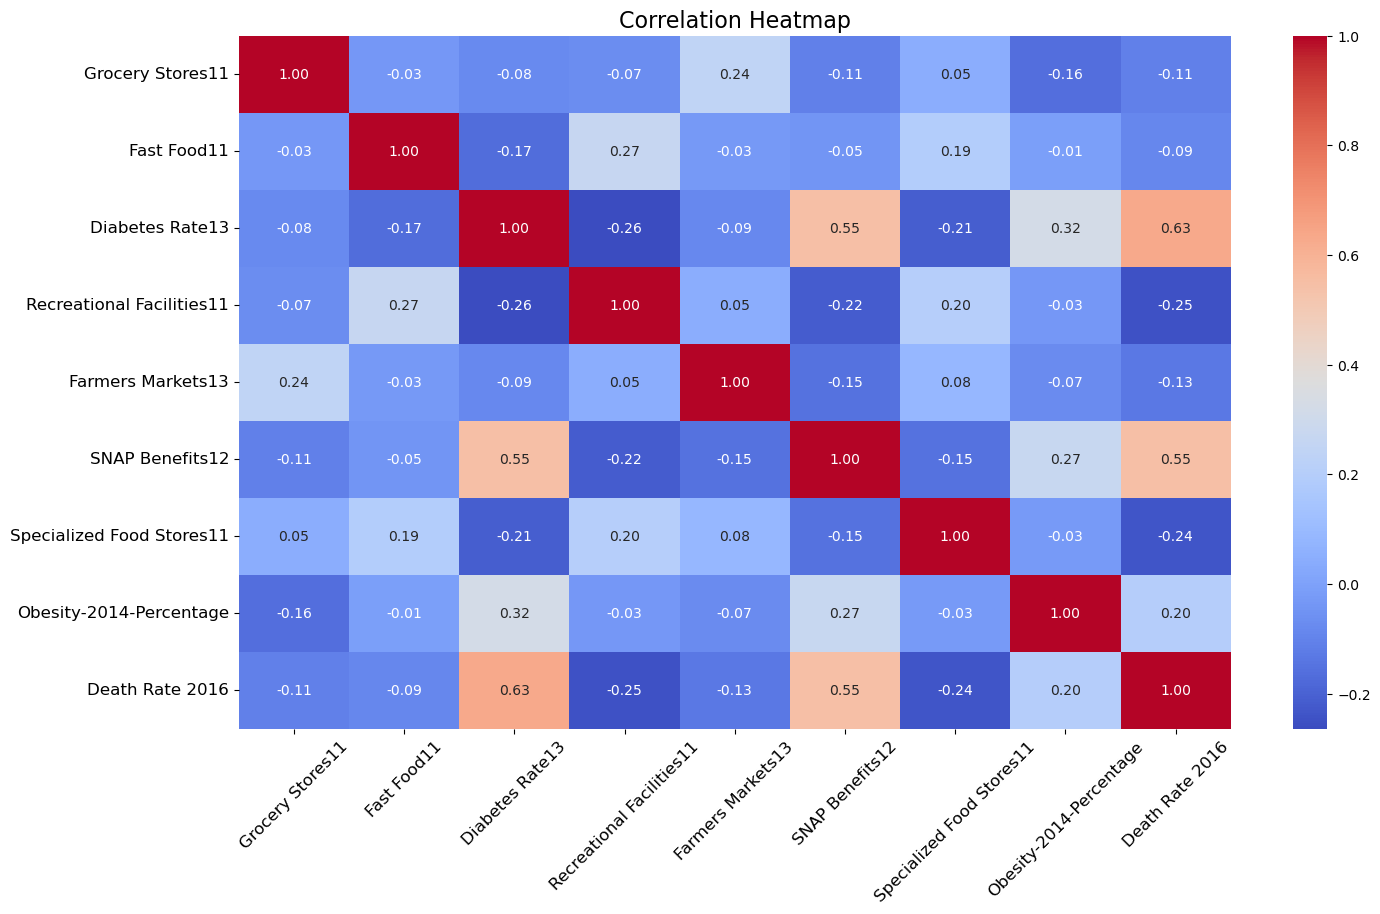

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom labels for the correlation heatmap
custom_labels = [
    'Grocery Stores11', 'Fast Food11',
    'Diabetes Rate13', 'Recreational Facilities11', 'Farmers Markets13',
    'SNAP Benefits12', 'Specialized Food Stores11', 'Obesity-2014-Percentage', 'Death Rate 2016' 
]

# Set up the matplotlib figure with desired size (width, height in inches)
plt.figure(figsize=(16, 9))  # Adjust these values as needed to fit your heatmap

# Assuming new_merged_gdf is your merged DataFrame and you've calculated the correlation matrix
corr_matrix = new_merged_gdf[['GROCPTH11', 'FFRPTH11',
                              'PCT_DIABETES_ADULTS13', 'RECFACPTH11', 'FMRKTPTH13', 'PC_SNAPBEN12', 
                              'SPECSPTH11', 'Obesity-2014-Percentage','D_rate_per_100k_2016']].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=custom_labels, yticklabels=custom_labels)

plt.title('Correlation Heatmap', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels to 45 degrees for readability
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal

plt.show()



C:\Users\Maze\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


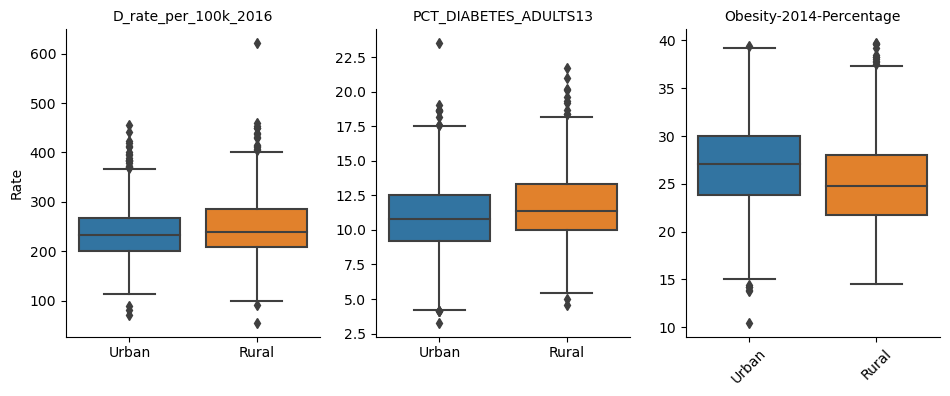

In [80]:
# First, melt your DataFrame to long format
df_melted = new_merged_gdf.melt(id_vars=['Urban_Rural'], value_vars=['D_rate_per_100k_2016', 'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage'],
                    var_name='Metric', value_name='Value')

# Create faceted boxplots
g = sns.catplot(x='Urban_Rural', y='Value', col='Metric', data=df_melted, kind='box',
                height=4, aspect=0.8, sharey=False)

g.set_titles("{col_name}")
g.set_axis_labels("", "Rate")
plt.xticks(rotation=45)
plt.show()

C:\Users\Maze\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


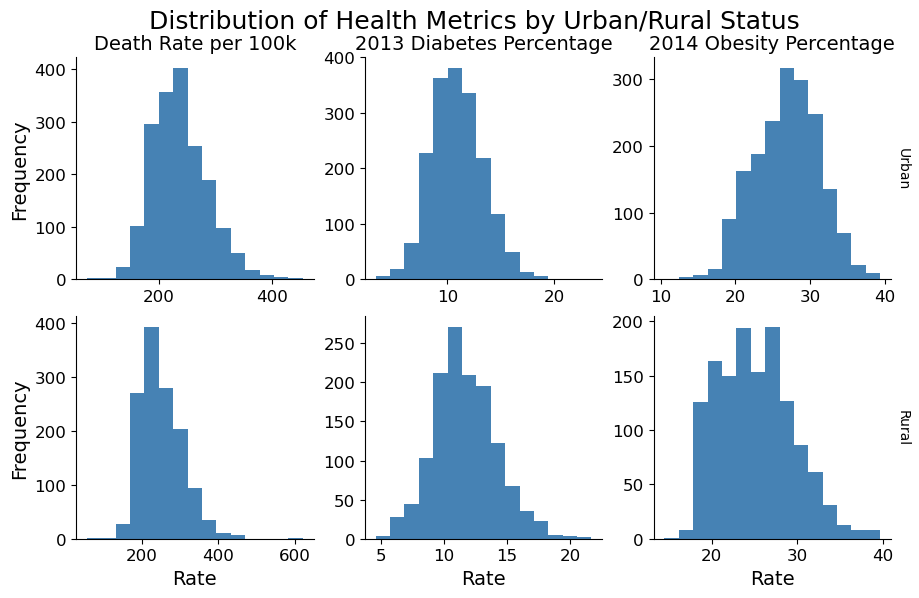

In [81]:
# Melt the DataFrame to long format for FacetGrid plotting
df_melted = new_merged_gdf.melt(id_vars=['Urban_Rural'],
                                value_vars=['D_rate_per_100k_2016', 'PCT_DIABETES_ADULTS13','Obesity-2014-Percentage'],
                                var_name='Metric', value_name='Value')

# Create a dictionary to map original column names to new, more readable names
new_names = {
    'D_rate_per_100k_2016': 'Death Rate per 100k',
    'PCT_DIABETES_ADULTS13': '2013 Diabetes Percentage',
    'Obesity-2014-Percentage': '2014 Obesity Percentage'
}

# Apply the mapping to the 'Metric' column in 'df_melted' to use new names
df_melted['Metric'] = df_melted['Metric'].map(new_names)

# Create the FacetGrid with the updated 'df_melted'
g = sns.FacetGrid(df_melted, col="Metric", row="Urban_Rural", margin_titles=True, sharex=False, sharey=False)
g.map(plt.hist, "Value", bins=15, color="steelblue")

# Setting axis labels with an increased font size and customizing the titles for each facet
g.set_axis_labels("Rate", "Frequency")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Loop through axes to adjust font sizes for the titles and tick labels
for ax in g.axes.flatten():
    # Adjust title font size
    ax_title = ax.get_title()
    ax.set_title(ax_title, fontsize=14)
    
    # Adjust tick label font size
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust the font size for the axis labels
g.set_axis_labels("Rate", "Frequency", fontsize=14)

# Adjusting the font size for row and column titles directly
# Seaborn does not provide a built-in way to do this for the FacetGrid titles,
# so we use matplotlib's text objects directly
for ax in g.axes[:, 0]:  # Column 0 for row titles
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

for ax in g.axes[-1, :]:  # Last row for column titles
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)

# Adjust the overall figure title (sup title)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Health Metrics by Urban/Rural Status', fontsize=18)

plt.show()



In [82]:
# import folium

# # Initialize the map centered around a point.

# m = folium.Map(location=[32.678, -86.41300], zoom_start=5)

# # Create a choropleth map. 'geo_data' is the GeoJSON representation of your GeoDataFrame,
# # 'data' is your GeoDataFrame, 'columns' includes the column that contains the identifiers
# # and the column you want to visualize, 'key_on' is the path to the identifier within the
# # GeoJSON structure, and 'fill_color' is the palette for the gradient.
# folium.Choropleth(
#     geo_data=new_merged_gdf.to_json(),
#     data=new_merged_gdf,
#     columns=['FIPS', 'SPECSPTH11'],
#     key_on='feature.properties.FIPS',
#     fill_color='YlOrRd',  # Or another color scale from Folium or branca.colormap
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Specicialized Stores Per 1000',
#     smooth_factor=0,
#     Highlight=True,
#     line_color="#0000",
#     name='Specicialized Stores Per 1000',
#     show=True,
#     overlay=True,
#     nan_fill_color="White"
# ).add_to(m)

# # Display the map
# m

## Spatial Analysis
### Moran's I Spatial Autocorrelation Statistics

In [83]:
# Calculate spatial weights based on queen contiguity
w = Queen.from_dataframe(new_merged_gdf)
w.transform = 'r'  # Row-standardize the weights

# Moran's I for diabetes population
mi_diabetes13 = Moran(new_merged_gdf['PCT_DIABETES_ADULTS13'], w)
print(f"Moran's I for Diabetes Percentage 2013: {mi_diabetes13.I}, p-value: {mi_diabetes13.p_sim}")

# Moran's I for Obesity percentage per population
mi_obesity = Moran(new_merged_gdf['Obesity-2014-Percentage'], w)
print(f"Moran's I for Obesity percentage/population 2014: {mi_obesity.I}, p-value: {mi_obesity.p_sim}")

# Moran's I for death rate per 100,000 population
mi_death = Moran(new_merged_gdf['D_rate_per_100k_2016'], w)
print(f"Moran's I for Death Rate per 100,000: {mi_death.I}, p-value: {mi_death.p_sim}")

# Moran's I for fast food per thoudand population
mi_fastfood = Moran(new_merged_gdf['FFRPTH11'], w)
print(f"Moran's I for fastfood stores per thousand pop: {mi_fastfood.I}, p-value: {mi_fastfood.p_sim}")

# Moran's I for Grocery stores per thoudand population
mi_grocery = Moran(new_merged_gdf['GROCPTH11'], w)
print(f"Moran's I for grocery stores per thousand pop: {mi_grocery.I}, p-value: {mi_grocery.p_sim}")

# Moran's I for Grocery stores per thoudand population
mi_farmersmarket = Moran(new_merged_gdf['FMRKTPTH13'], w)
print(f"Moran's I for farmer's market per thousand pop: {mi_farmersmarket.I}, p-value: {mi_farmersmarket.p_sim}")

# # Moran's I for Grocery stores per thoudand population
# mi_SNAPben = Moran(new_merged_gdf['PC_SNAPBEN12'], w)
# print(f"Moran's I for SNAP percentage per pop: {mi_SNAPben.I}, p-value: {mi_SNAPben.p_sim}")

# Moran's I for specialised food stores per thoudand population
mi_specialized = Moran(new_merged_gdf['SPECSPTH11'], w)
print(f"Moran's I for specialized stores per thousand pop: {mi_specialized.I}, p-value: {mi_specialized.p_sim}")

# Moran's I for specialised food stores per thoudand population
mi_fitness = Moran(new_merged_gdf['RECFACPTH11'], w)
print(f"Moran's I for fitness per thousand pop: {mi_fitness.I}, p-value: {mi_fitness.p_sim}")

C:\Users\Maze\AppData\Local\Temp\ipykernel_28772\3506201964.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(new_merged_gdf)
C:\Users\Maze\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 68, 77, 84, 537, 538, 540, 1211, 1217, 2970.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 537, ' is an island (no neighbors)')
('WARNING: ', 538, ' is an island (no neighbors)')
('WARNING: ', 540, ' is an island (no neighbors)')
('WARNING: ', 1211, ' is an island (no neighbors)')
('WARNING: ', 1217, ' is an island (no neighbors)')
('WARNING: ', 2970, ' is an island (no neighbors)')
Moran's I for Diabetes Percentage 2013: 0.640110720533485, p-value: 0.001
Moran's I for Obesity percentage/population 2014: 0.3762942772291716, p-value: 0.001
Moran's I for Death Rate per 100,000: 0.6916262519566444, p-value: 0.001
Moran's I for fastfood stores per thousand pop: 0.07751380408327553, p-value: 0.001
Moran's I for grocery stores per thousand pop: 0.29005765112184845, p-value: 0.001
Moran's I for farmer's market per thousand pop: 0.1693822848549929, p-value: 0.001
Moran's I for specialized stores per thousand pop: 0.166166

In [84]:
# Checking for missing values in SNAPBEN12
new_merged_gdf.PC_SNAPBEN12.isna().sum()

53

In [85]:
#checking the list of columns
new_merged_gdf.columns

Index(['FIPS', 'GROCPTH16', 'SUPERCPTH16', 'FFRPTH11', 'FFRPTH16',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS17', 'RECFACPTH11',
       'RECFACPTH16', 'D_rate_per_100k_2011', 'D_rate_per_100k_2016', 'NAME',
       'STATE_NAME', 'geometry', 'Urban_Rural', 'Obesity-2014-Percentage',
       'FMRKTPTH13', 'PC_SNAPBEN12', 'GROCPTH11', 'SPECSPTH11',
       'PCT_65OLDER10', 'POVRATE15'],
      dtype='object')

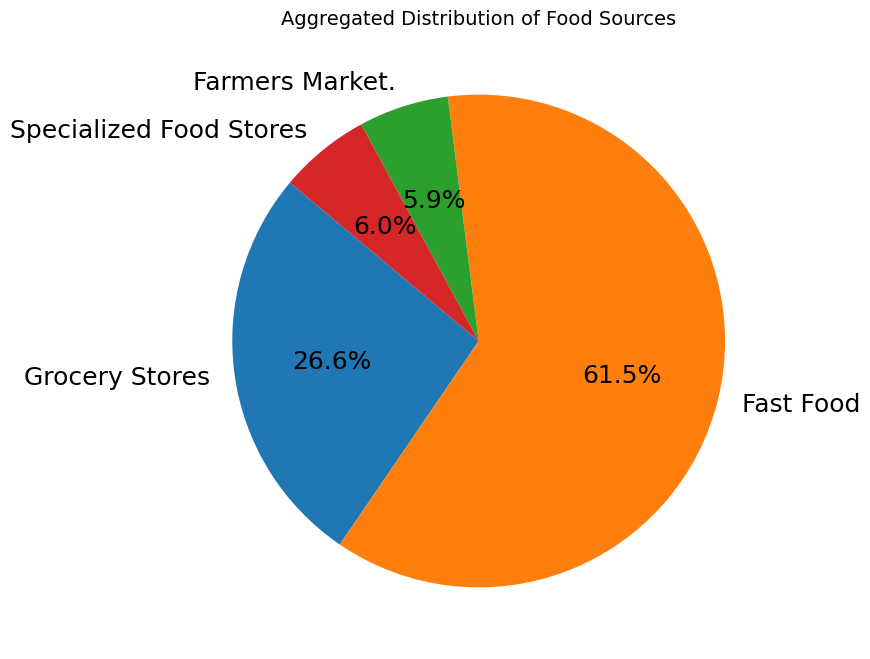

In [86]:
# Pie plot
df_pie = new_merged_gdf[['GROCPTH16','FFRPTH11','FMRKTPTH13','SPECSPTH11']]
food_sources_sums = df_pie.sum()

custom_labels = ['Grocery Stores', 'Fast Food', 'Farmers Market.', 'Specialized Food Stores']

# Example DataFrame data
# df_pie = new_merged_gdf[['GROCPTH16','FFRPTH11','FMRKTPTH13','SPECSPTH11']]
# Assuming df_pie.sum() works as intended and you've calculated food_sources_sums

# Create a pie chart with adjusted text sizes
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired
pie_wedges = plt.pie(food_sources_sums, labels=custom_labels, autopct=lambda p: '{:.1f}%'.format(p),
                     startangle=140, textprops={'fontsize': 18})

plt.title('Aggregated Distribution of Food Sources', fontsize=14)
plt.show()

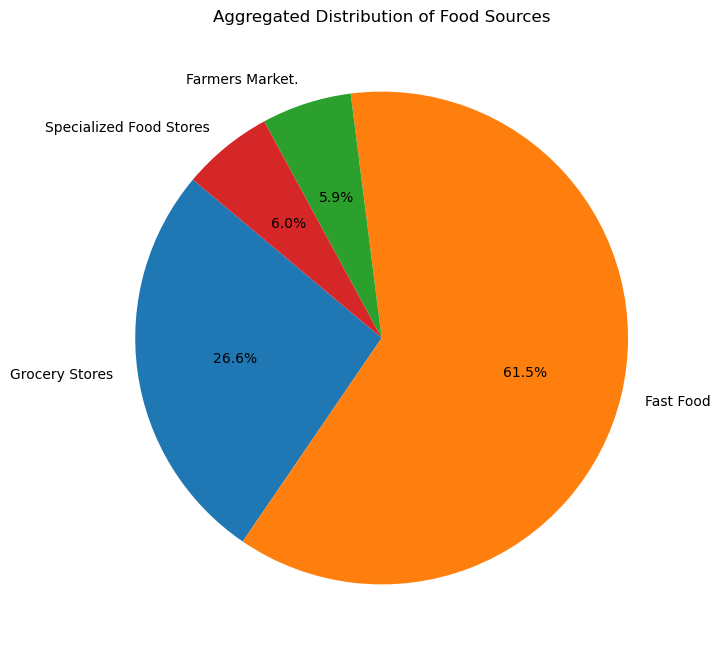

In [87]:
# Example DataFrame
df_pie = new_merged_gdf[['GROCPTH16','FFRPTH11','FMRKTPTH13','SPECSPTH11']]
food_sources_sums = df_pie.sum()

custom_labels = ['Grocery Stores', 'Fast Food', 'Farmers Market.', 'Specialized Food Stores']

# Create a pie chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired
plt.pie(food_sources_sums, labels=custom_labels, autopct='%1.1f%%', startangle=140,)
plt.title('Aggregated Distribution of Food Sources')
plt.setp(pie_wedges[2], fontsize=14)
plt.show()

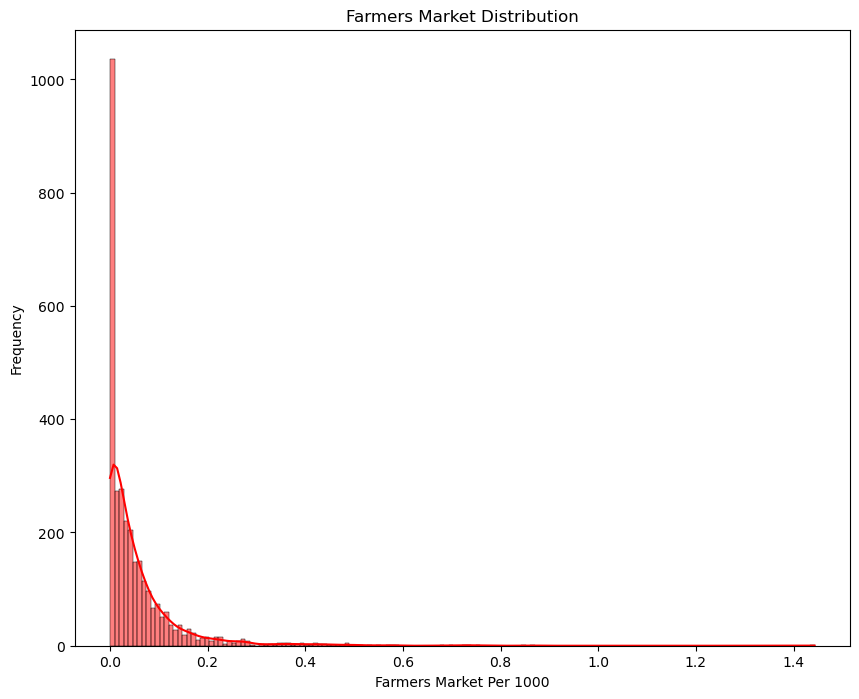

In [88]:
# Histogram for Farmer's Market
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired
sns.histplot(new_merged_gdf['FMRKTPTH13'], kde=True, color='red')
plt.title('Farmers Market Distribution')
plt.xlabel('Farmers Market Per 1000')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Example for one DataFrame, repeat for others as necessary
df_local_selected['FIPS'] = df_local_selected['FIPS'].str.split('.').str[0].str.zfill(5)
df_assistance_selected['FIPS'] = df_assistance_selected['FIPS'].str.split('.').str[0].str.zfill(5)
df_stores_2.loc[:, 'FIPS'] = df_stores_2['FIPS'].str.split('.').str[0].str.zfill(5)

C:\Users\Maze\AppData\Local\Temp\ipykernel_28772\373514458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local_selected['FIPS'] = df_local_selected['FIPS'].str.split('.').str[0].str.zfill(5)
C:\Users\Maze\AppData\Local\Temp\ipykernel_28772\373514458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assistance_selected['FIPS'] = df_assistance_selected['FIPS'].str.split('.').str[0].str.zfill(5)


## Hotspot Analysis Using Getis Ord GI*

C:\Users\Maze\AppData\Local\Temp\ipykernel_28772\1775134589.py:11: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf_no_ak_hi)  # or Rook.from_dataframe(gdf) for rook contiguity
C:\Users\Maze\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 1186, 1192, 2945.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\Maze\anaconda3\Lib\site-packages\esda\getisord.py:615: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of 

('WARNING: ', 1186, ' is an island (no neighbors)')
('WARNING: ', 1192, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')
('WARNING: ', 1186, ' is an island (no neighbors)')
('WARNING: ', 1192, ' is an island (no neighbors)')
('WARNING: ', 2945, ' is an island (no neighbors)')


C:\Users\Maze\anaconda3\Lib\site-packages\esda\getisord.py:443: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim
C:\Users\Maze\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Maze\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


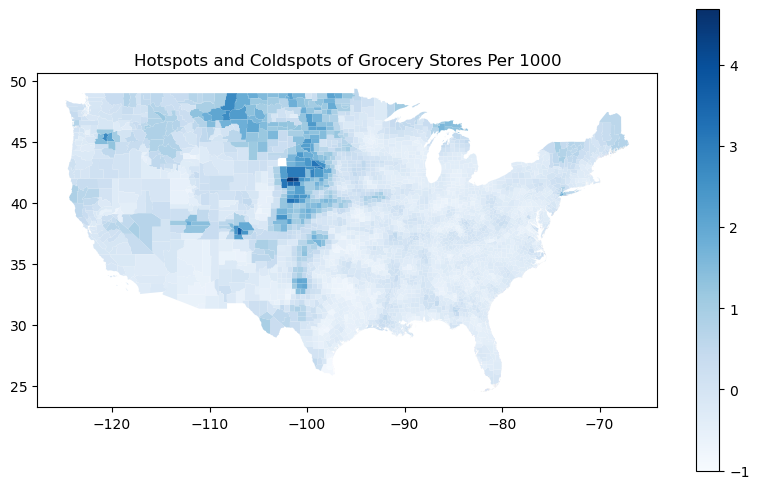

In [90]:
##
import geopandas as gpd
import matplotlib.pyplot as plt
from esda.getisord import G_Local
from libpysal.weights import Queen, Rook

#Ignore the Alaska and Hawaii regions
gdf_no_ak_hi = new_merged_gdf[~new_merged_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

#Create the weights 
w = Queen.from_dataframe(gdf_no_ak_hi)  # or Rook.from_dataframe(gdf) for rook contiguity
w.transform = 'R'

# Example for a variable like  Grocery stores per thousand population
g_grocery = G_Local(gdf_no_ak_hi['GROCPTH11'], w, star=True)  # Typically star=True includes the location’s own value

# Add the results back to the GeoDataFrame
gdf_no_ak_hi['grocery_Gi_Z'] = g_grocery.Zs  # Z-scores
gdf_no_ak_hi['grocery_Gi_p'] = g_grocery.p_sim  # p-values from permutation-based simulation

# Plotting the Z-scores to visualize hotspots and coldspots
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_no_ak_hi.plot(column='grocery_Gi_Z', cmap='Blues', legend=True, ax=ax)
ax.set_title('Hotspots and Coldspots of Grocery Stores Per 1000')
plt.show()


In [91]:
# Generate a plot to visualize data
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from esda.getisord import G_Local
# from libpysal.weights import Queen

# # Assuming 'gdf' is your GeoDataFrame with the proper geographic setup
# # Exclude rows where STATE_NAME is Alaska or Hawaii
# # gdf_contiguous = gdf[~gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# # Split the data into urban and rural GeoDataFrames
# urban_gdf = gdf_no_ak_hi[gdf_no_ak_hi['Urban_Rural'] == 'Urban']
# rural_gdf = gdf_no_ak_hi[gdf_no_ak_hi['Urban_Rural'] == 'Rural']

# # Perform hotspot analysis for urban areas
# w_urban = Queen.from_dataframe(urban_gdf)
# w_urban.transform = 'R'
# g_fast_food_urban = G_Local(urban_gdf['FFRPTH11'], w_urban, star=True)  
# urban_gdf['fastfood_Gi_Z'] = g_fast_food_urban.Zs
# urban_gdf['fastfood_Gi_p'] = g_fast_food_urban.p_sim

# # Perform hotspot analysis for rural areas
# w_rural = Queen.from_dataframe(rural_gdf)
# w_rural.transform = 'R'
# g_fast_food_rural = G_Local(rural_gdf['FFRPTH11'], w_rural, star=True)  
# rural_gdf['fastfood_Gi_Z'] = g_fast_food_rural.Zs
# rural_gdf['fastfood_Gi_p'] = g_fast_food_rural.p_sim

# # Plotting the results
# fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# # Urban Hotspots and Coldspots
# urban_plot = urban_gdf.plot(column='fastfood_Gi_Z', cmap='hot', legend=True, ax=ax[0])
# ax[0].set_title('Urban Hotspots and Coldspots of Fast Food Stores (Excluding AK and HI)')

# # Rural Hotspots and Coldspots
# rural_plot = rural_gdf.plot(column='fastfood_Gi_Z', cmap='hot', legend=True, ax=ax[1])
# ax[1].set_title('Rural Hotspots and Coldspots of Fast Food Stores (Excluding AK and HI)')

# # Display the plots
# plt.show()



In [92]:
# Merge data frames on a key column
print(new_merged_gdf.crs)

EPSG:4326


In [93]:
# Projecting to a UTM zone suitable for your data's location
converted_gdf = new_merged_gdf.to_crs(epsg='3857')


In [94]:
# Display the first few rows of the DataFrame to inspect data
print(converted_gdf.crs)
converted_gdf.head()

EPSG:3857


,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,...,STATE_NAME,geometry,Urban_Rural,Obesity-2014-Percentage,FMRKTPTH13,PC_SNAPBEN12,GROCPTH11,SPECSPTH11,PCT_65OLDER10,POVRATE15
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,...,Alabama,"POLYGON ((-9619464.597 3856529.258, -9619451.3...",Urban,30.4,0.018277,18.471487,0.090581,0.018116,11.995382,12.7
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,...,Alabama,"MULTIPOLYGON (((-9747680.970 3539801.334, -974...",Urban,26.3,0.020525,15.890722,0.144746,0.107219,16.771185,12.9
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,...,Alabama,"POLYGON ((-9490859.154 3782745.368, -9490934.1...",Rural,37.5,0.111342,31.116222,0.219370,0.109685,14.236807,32.0
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,...,Alabama,"POLYGON ((-9692114.170 3928123.612, -9692005.6...",Urban,30.5,0.044413,22.435049,0.263794,0.000000,12.681650,22.2
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,...,Alabama,"POLYGON ((-9623906.701 4063676.211, -9623890.4...",Urban,30.1,0.017358,20.272305,0.121608,0.017373,14.722096,14.7


In [95]:
# Processing step
converted_gdf.columns

Index(['FIPS', 'GROCPTH16', 'SUPERCPTH16', 'FFRPTH11', 'FFRPTH16',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS17', 'RECFACPTH11',
       'RECFACPTH16', 'D_rate_per_100k_2011', 'D_rate_per_100k_2016', 'NAME',
       'STATE_NAME', 'geometry', 'Urban_Rural', 'Obesity-2014-Percentage',
       'FMRKTPTH13', 'PC_SNAPBEN12', 'GROCPTH11', 'SPECSPTH11',
       'PCT_65OLDER10', 'POVRATE15'],
      dtype='object')

## Spatial Clustering Using DBSCAN

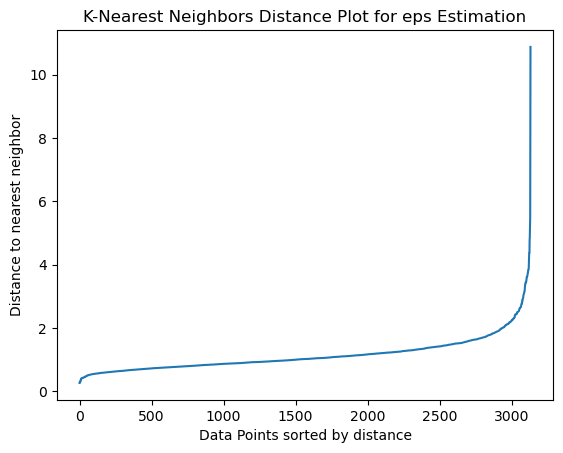

Suggested eps: 1.7192101112658194


In [96]:
# Fining the optimal eps using the k-nearest neighbour
# Generate a plot to visualize data
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


# Extract coordinates from geometry
converted_gdf['x'] = converted_gdf.geometry.centroid.x
converted_gdf['y'] = converted_gdf.geometry.centroid.y

# Define the columns for clustering
columns = ['x', 'y', 'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13','RECFACPTH11',
           'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016', 'Urban_Rural']

# Preprocess the data: scale numeric values and encode categorical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['x', 'y', 'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
                                   'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']),
        ('cat', OneHotEncoder(), ['Urban_Rural'])
    ]
)

# Fit and transform the data
data_preprocessed = preprocessor.fit_transform(converted_gdf[columns])

# Using NearestNeighbors to estimate a good eps
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = nearest_neighbors.fit(data_preprocessed)
distances, indices = neighbors_fit.kneighbors(data_preprocessed)

# Sort distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # distance to the nearest neighbor
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Distance to nearest neighbor')
plt.title('K-Nearest Neighbors Distance Plot for eps Estimation')
plt.show()

# Suggesting an eps
# You can look at the plot where there's an "elbow" that might be a good value for eps
eps_suggested = np.percentile(distances, 90)  # taking the 90th percentile as an example
print(f"Suggested eps: {eps_suggested}")


In [97]:
# Display the first few rows of the DataFrame
# Display the first few rows of the DataFrame to inspect data
converted_gdf.head()


,FIPS,GROCPTH16,SUPERCPTH16,FFRPTH11,FFRPTH16,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS17,RECFACPTH11,RECFACPTH16,D_rate_per_100k_2011,...,Urban_Rural,Obesity-2014-Percentage,FMRKTPTH13,PC_SNAPBEN12,GROCPTH11,SPECSPTH11,PCT_65OLDER10,POVRATE15,x,y
0,01001,0.054271,0.018090,0.615953,0.795977,13.0,36.3,0.072465,0.108542,318.7,...,Urban,30.4,0.018277,18.471487,0.090581,0.018116,11.995382,12.7,-9.645027e+06,3.833754e+06
1,01003,0.139753,0.033733,0.648675,0.751775,10.4,36.3,0.085775,0.101200,278.1,...,Urban,26.3,0.020525,15.890722,0.144746,0.107219,16.771185,12.9,-9.765443e+06,3.598776e+06
2,01005,0.155195,0.038799,0.694673,0.892372,18.4,36.3,0.073123,0.000000,376.3,...,Rural,37.5,0.111342,31.116222,0.219370,0.109685,14.236807,32.0,-9.505915e+06,3.746244e+06
3,01007,0.220916,0.044183,0.263794,0.309283,14.8,36.3,0.000000,0.044183,333.6,...,Urban,30.5,0.044413,22.435049,0.263794,0.000000,12.681650,22.2,-9.698870e+06,3.895148e+06
4,01009,0.086863,0.017373,0.347451,0.399569,14.1,36.3,0.052118,0.069490,299.6,...,Urban,30.1,0.017358,20.272305,0.121608,0.017373,14.722096,14.7,-9.636627e+06,4.026265e+06


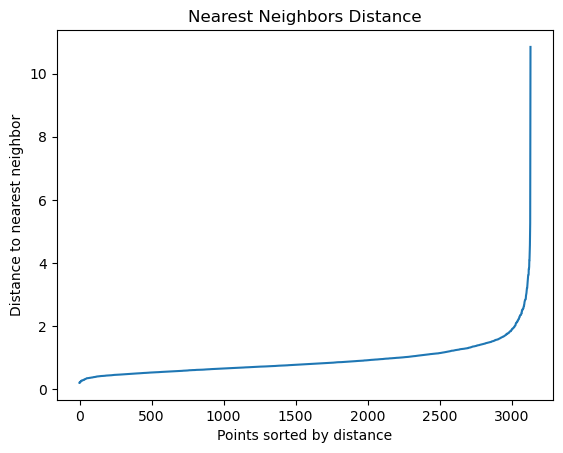

Suggested eps: 1.4533300085304466


In [98]:
# Import pandas for data manipulation
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



# Specify the columns for clustering, including the categorical data
columns = ['FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13','RECFACPTH11',
           'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016', 'Urban_Rural']

# Define the preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13','RECFACPTH11',
                       'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']),
        ('cat', OneHotEncoder(), ['Urban_Rural'])
    ]
)

# Fit and transform the data
data_preprocessed = preprocessor.fit_transform(converted_gdf[columns])

# Use NearestNeighbors to estimate a good 'eps'
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = nearest_neighbors.fit(data_preprocessed)
distances, indices = neighbors_fit.kneighbors(data_preprocessed)

# Sort distances and plot for 'eps' estimation
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # The distances to the nearest neighbor
plt.plot(distances)
plt.title('Nearest Neighbors Distance')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest neighbor')
plt.show()

# Suggesting an 'eps' from the plot
# Typically you would look for an "elbow" in the plotted line
eps_suggested = np.percentile(distances, 90)  # Adjust this percentile based on your specific plot
print("Suggested eps:", eps_suggested)


Unique cluster labels: [0, -1, 1, 2, 4, 3]
Categories (6, int64): [-1, 0, 1, 2, 3, 4]
         FFRPTH11  GROCPTH11  SPECSPTH11  FMRKTPTH13  RECFACPTH11  \
Cluster                                                             
-1            NaN        NaN         NaN         NaN          NaN   
0        0.553756   0.213552    0.045958    0.038210     0.066136   
1        0.539991   0.397350    0.082077    0.101351     0.109343   
2        0.389985   0.799155    0.000000    0.439612     0.000000   
3        0.406368   1.178322    0.000000    0.000000     0.000000   
4        0.599417   0.392375    0.101519    0.137719     0.154880   

         PCT_DIABETES_ADULTS13  Obesity-2014-Percentage  D_rate_per_100k_2016  \
Cluster                                                                         
-1                         NaN                      NaN                   NaN   
0                    11.377028                26.450038            245.332790   
1                     9.860000       

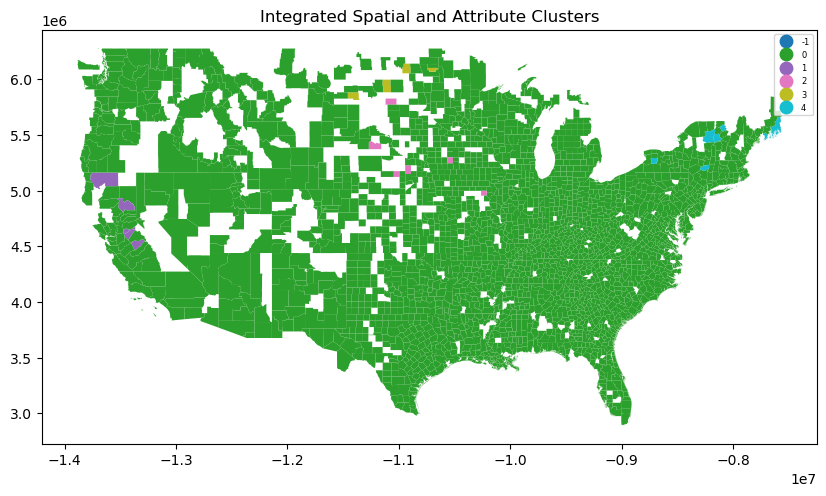

In [99]:
# DBSCAN implementation with the Rural_Urban attribute
# Import pandas for data manipulation
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

projected_gdf = converted_gdf.copy()

#Ignore the Alaska and Hawaii regions
projected_gdf = projected_gdf[~projected_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Extract coordinates from geometry
projected_gdf['x'] = projected_gdf.geometry.centroid.x
projected_gdf['y'] = projected_gdf.geometry.centroid.y

# Define the columns for clustering
columns = ['x', 'y', 'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
           'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016', 'Urban_Rural']

# Preprocess the data: scale numeric values and encode categorical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['x', 'y', 'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
                                   'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']),
        ('cat', OneHotEncoder(), ['Urban_Rural'])
    ]
)

# Fit and transform the data
data_preprocessed = preprocessor.fit_transform(projected_gdf[columns])

# Apply DBSCAN
dbscan = DBSCAN(eps=1.7, min_samples=5)
clusters = dbscan.fit_predict(data_preprocessed)

# Add cluster labels back to the GeoDataFrame
projected_gdf['Cluster'] = clusters
projected_gdf['Cluster'] = projected_gdf['Cluster'].astype('category')  # Convert Cluster to a categorical type

# Print unique cluster labels
print("Unique cluster labels:", projected_gdf['Cluster'].unique())

# Filter dataframe to avoid noise and ensure 'Cluster' column is used directly in groupby
filtered_gdf = projected_gdf[projected_gdf['Cluster'] != -1]

# Define numeric columns for mean calculation
numeric_columns = ['FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
                   'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']

# Calculate mean values of numeric variables for each cluster
cluster_summary = filtered_gdf.groupby('Cluster')[numeric_columns].mean()

# Optionally, count the number of observations per cluster
cluster_summary['Count'] = filtered_gdf.groupby('Cluster').size()

# Count observations by Urban_Rural designation within each cluster
urban_rural_counts = filtered_gdf.groupby(['Cluster', 'Urban_Rural']).size().unstack(fill_value=0)

# Merge the urban/rural counts with the cluster summary
cluster_summary = cluster_summary.join(urban_rural_counts)

# Display the summary table
print(cluster_summary)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 6))
filtered_gdf.plot(column='Cluster', categorical=True, legend=True, ax=ax, legend_kwds={'fontsize': 6, 'title_fontsize': 7})
ax.set_title('Integrated Spatial and Attribute Clusters')
plt.show()


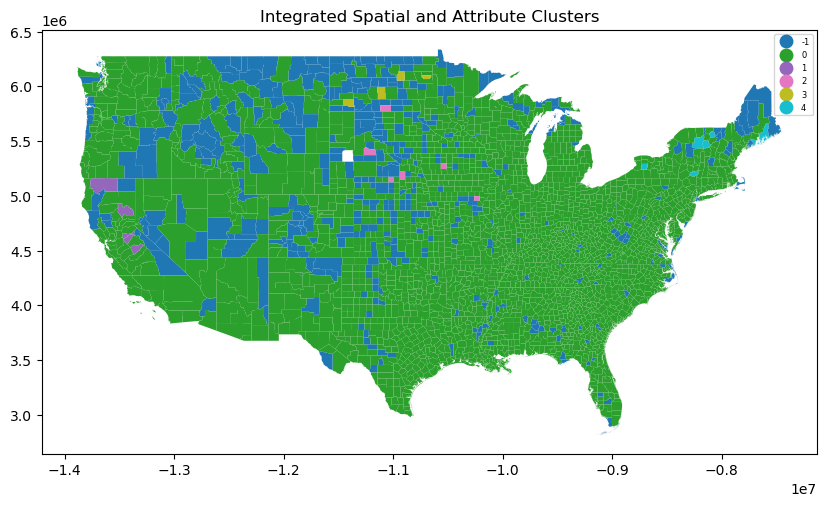

In [100]:
# 
# Import pandas for data manipulation
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

projected_gdf= converted_gdf.copy()

projected_gdf = projected_gdf[~projected_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Extract coordinates from geometry
projected_gdf['x'] = projected_gdf.geometry.centroid.x
projected_gdf['y'] = projected_gdf.geometry.centroid.y

# Define the columns for clustering
columns = ['x', 'y','FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13','RECFACPTH11',
           'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016', 'Urban_Rural']

# Preprocess the data: scale numeric values and encode categorical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['x', 'y','FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13','RECFACPTH11',
                       'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']),
        ('cat', OneHotEncoder(), ['Urban_Rural'])
    ]
)

# Fit and transform the data
data_preprocessed = preprocessor.fit_transform(projected_gdf[columns])

# Apply DBSCAN
dbscan = DBSCAN(eps=1.7, min_samples=5)  # Adjust eps based on your data's spatial distribution
clusters = dbscan.fit_predict(data_preprocessed)

# Add cluster labels back to the GeoDataFrame
projected_gdf['Cluster'] = clusters

# # Calculate mean values of numeric variables for each cluster, ignoring noise (-1 cluster)
# numeric_columns = ['FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
#                    'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016']  # purely numeric columns
# cluster_summary = projected_gdf[projected_gdf['Cluster'] != -1][numeric_columns].groupby('Cluster').mean()

# # Optionally, count the number of observations per cluster
# cluster_summary['Count'] = projected_gdf[projected_gdf['Cluster'] != -1].groupby('Cluster').size()

# # Count observations by Urban_Rural designation within each cluster
# urban_rural_counts = projected_gdf[projected_gdf['Cluster'] != -1].groupby(['Cluster', 'Urban_Rural']).size().unstack(fill_value=0)

# # Merge the urban/rural counts with the cluster summary
# cluster_summary = cluster_summary.join(urban_rural_counts)

# # Display the summary table
# print(cluster_summary)

# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 6))
projected_gdf.plot(column='Cluster', categorical=True, legend=True, ax=ax, legend_kwds={'fontsize': 6, 'title_fontsize': 7})
ax.set_title('Integrated Spatial and Attribute Clusters')
plt.show()


         FFRPTH11  GROCPTH11  SPECSPTH11  FMRKTPTH13  RECFACPTH11  \
Cluster                                                             
0        0.600433   0.179828    0.054610    0.032862     0.080416   
1        0.465984   0.275161    0.030506    0.050462     0.041304   
2        0.719611   0.287437    0.228717    0.012787     0.014403   
3        0.354886   0.751628    0.000000    0.428574     0.000000   
4        0.000000   1.416657    0.000000    0.000000     0.000000   
5        0.418980   0.630756    0.087195    0.283042     0.099462   

         PCT_DIABETES_ADULTS13  Obesity-2014-Percentage  D_rate_per_100k_2016  \
Cluster                                                                         
0                    10.946416                27.115293            237.419654   
1                    11.995511                25.249061            256.304697   
2                    10.928571                19.585714            244.842857   
3                    10.766667            

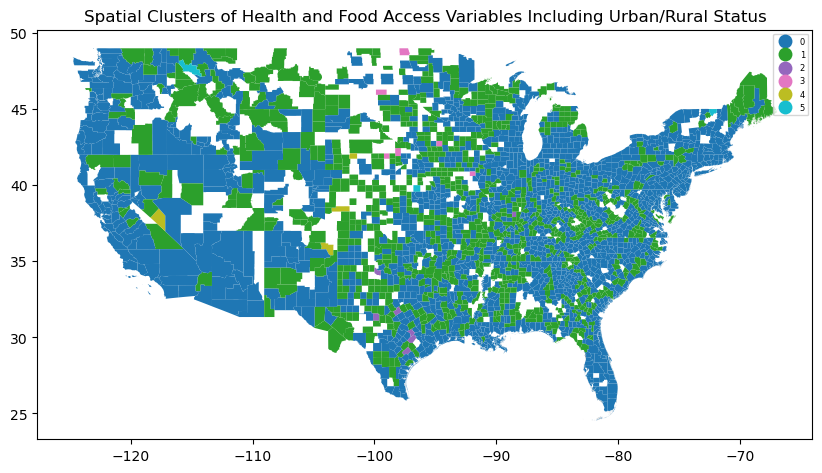

In [101]:
# Implementation of DBSCAN providing summary statistics of each cluster
# Import pandas for data manipulation
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'new_merged_gdf' is your GeoDataFrame that includes all necessary data
data_for_clustering = new_merged_gdf.copy()

data_for_clustering = data_for_clustering[~data_for_clustering['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

# Define columns that should be included in clustering
columns = [
    'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
    'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016', 'Urban_Rural'
]

# Define columns that are strictly numeric for later operations
numeric_columns = [
    'FFRPTH11', 'GROCPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'RECFACPTH11',
    'PCT_DIABETES_ADULTS13', 'Obesity-2014-Percentage', 'D_rate_per_100k_2016'
]

# Preprocessing: scale numeric values and encode categorical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), ['Urban_Rural'])
    ]
)

# Fit and transform the data for clustering
data_preprocessed = preprocessor.fit_transform(data_for_clustering[columns])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.4, min_samples=5)
clusters = dbscan.fit_predict(data_preprocessed)

# Add cluster labels back to the GeoDataFrame
data_for_clustering['Cluster'] = clusters

# Filter data to avoid noise (-1 indicates noise in DBSCAN)
filtered_data = data_for_clustering[data_for_clustering['Cluster'] != -1]

# Calculate mean values of numeric variables for each cluster
cluster_summary = filtered_data[numeric_columns + ['Cluster']].groupby('Cluster').mean()


# Count observations by Urban_Rural designation within each cluster
urban_rural_counts = filtered_data.groupby(['Cluster', 'Urban_Rural']).size().unstack(fill_value=0)

# Optionally, count the number of observations per cluster
cluster_summary['Count'] = filtered_data.groupby('Cluster').size()

# Merge the urban/rural counts with the cluster summary
cluster_summary = cluster_summary.join(urban_rural_counts)

# Display the summary table
print(cluster_summary)

# Plot the clusters spatially, if 'geometry' is part of your dataframe
fig, ax = plt.subplots(figsize=(10, 6))
filtered_data.plot(column='Cluster', categorical=True, legend=True, ax=ax, legend_kwds={'fontsize': 6, 'title_fontsize': 7} )
ax.set_title('Spatial Clusters of Health and Food Access Variables Including Urban/Rural Status')
plt.show()


## REGRESSION ANALYSIS - SPATIAL AUTOCORRELATION REGRESSION

In [102]:
# Installing the Pysal library
!pip install pysal

In [103]:
# Import pandas for data manipulation
import geopandas as gpd
import pandas as pd
from pysal.model import spreg
from pysal.lib import weights
import statsmodels.api as sm

regression_gdf = new_merged_gdf[~new_merged_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]  # Exclude Alaska and Hawaii

# Drop rows with NaN values specifically in the SNAP variable
regression_gdf = regression_gdf.dropna(subset=['PC_SNAPBEN12'])
regression_gdf.isna().sum()


FIPS                       0
GROCPTH16                  0
SUPERCPTH16                0
FFRPTH11                   0
FFRPTH16                   0
PCT_DIABETES_ADULTS13      0
PCT_OBESE_ADULTS17         0
RECFACPTH11                0
RECFACPTH16                0
D_rate_per_100k_2011       0
D_rate_per_100k_2016       0
NAME                       0
STATE_NAME                 0
geometry                   0
Urban_Rural                0
Obesity-2014-Percentage    0
FMRKTPTH13                 0
PC_SNAPBEN12               0
GROCPTH11                  0
SPECSPTH11                 0
PCT_65OLDER10              0
POVRATE15                  0
dtype: int64

In [104]:
# Drop or fill missing values
# List of island IDs to remove
island_ids = [1184, 1190, 2861, 2891, 1181]

# Remove islands from the GeoDataFrame
regression_gdf = regression_gdf[~regression_gdf.index.isin(island_ids)].reset_index(drop=True)

In [105]:
# Drop or fill missing values
# Remove the data point with index 1181
regression_gdf = regression_gdf.drop(index=1181)

# Reset the index if necessary
regression_gdf.reset_index(drop=True, inplace=True)

In [106]:
# Processing step
import geopandas as gpd

# 
print(isinstance(regression_gdf, gpd.GeoDataFrame))


True


In [107]:
# Regression Using Obesity as the Dependent Variable
import geopandas as gpd
import pandas as pd
from pysal.lib import weights
from pysal.model import spreg
import statsmodels.api as sm


# Building weights matrix ensuring no islands or disconnected components, setting use_index explicitly
w = weights.Queen.from_dataframe(regression_gdf, silence_warnings=True, use_index=False)
w.transform = 'r'

# Handling any potential disconnected components
if len(w.islands) > 0:
    regression_gdf = regression_gdf.drop(index=w.islands)
    w = weights.Queen.from_dataframe(regression_gdf, silence_warnings=True, use_index=False)
    w.transform = 'r'

# Ensure no islands remain
assert len(w.islands) == 0, "There are still islands in the weights matrix after handling."

# Setup for regression
y = regression_gdf['Obesity-2014-Percentage'].astype(float).values.reshape(-1, 1)
X = regression_gdf[['FFRPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'GROCPTH11', 'RECFACPTH11', 'PC_SNAPBEN12', 'Urban_Rural']]
X = pd.get_dummies(X, columns=['Urban_Rural'], drop_first=True)  # Convert categorical variable to dummy variables
X = sm.add_constant(X)  # Add a constant for the regression intercept

# Convert all columns to float explicitly, including the boolean dummy
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0).astype(float)
print("Data types in regression matrix:", X.dtypes)
print("NaN counts in X:", X.isnull().sum())  # Debugging line to check for NaNs

# Fit the Spatial Autoregressive Model
try:
    model = spreg.ML_Lag(y, X.values, w=w, name_y='Obesity Rate', name_x=['const'] + list(X.columns)[1:])
    print(model.summary)
except Exception as e:
    print("An error occurred:", e)


Data types in regression matrix: const                float64
FFRPTH11             float64
SPECSPTH11           float64
FMRKTPTH13           float64
GROCPTH11            float64
RECFACPTH11          float64
PC_SNAPBEN12         float64
Urban_Rural_Urban    float64
dtype: object
NaN counts in X: const                0
FFRPTH11             0
SPECSPTH11           0
FMRKTPTH13           0
GROCPTH11            0
RECFACPTH11          0
PC_SNAPBEN12         0
Urban_Rural_Urban    0
dtype: int64
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Obesity Rate                Number of Observations:        3046
Mean dependent var  :     26.2160                Number of Variables   :           9
S.D. dependent var  :      4.4342                Degrees of Freedom    :        3037
Pseudo R-squa

In [108]:
# Regression using Diabetes as Dependent Variable
import geopandas as gpd
import pandas as pd
from pysal.lib import weights
from pysal.model import spreg
import statsmodels.api as sm

# Load your data
regression_gdf2 = new_merged_gdf[~new_merged_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]  # Exclude Alaska and Hawaii

# Drop rows with NaN values specifically in the SNAP variable
regression_gdf2 = regression_gdf2.dropna(subset=['PC_SNAPBEN12'])
regression_gdf2.isna().sum()


# Remove islands from the GeoDataFrame
regression_gdf2 = regression_gdf2[~regression_gdf2.index.isin(island_ids)].reset_index(drop=True)

# Building weights matrix ensuring no islands or disconnected components, setting use_index explicitly
w = weights.Queen.from_dataframe(regression_gdf2, silence_warnings=True, use_index=False)
w.transform = 'r'

# Handling any potential disconnected components
if len(w.islands) > 0:
    regression_gdf2 = regression_gdf2.drop(index=w.islands)
    w = weights.Queen.from_dataframe(regression_gdf2, silence_warnings=True, use_index=False)
    w.transform = 'r'

# Ensure no islands remain
assert len(w.islands) == 0, "There are still islands in the weights matrix after handling."

# Setup for regression
y = regression_gdf2['PCT_DIABETES_ADULTS13'].astype(float).values.reshape(-1, 1)
X = regression_gdf2[['FFRPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'GROCPTH11', 'RECFACPTH11', 'PC_SNAPBEN12', 'Urban_Rural']]
X = pd.get_dummies(X, columns=['Urban_Rural'], drop_first=True)  # Convert categorical variable to dummy variables
X = sm.add_constant(X)  # Add a constant for the regression intercept

# Convert all columns to float explicitly, including the boolean dummy
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0).astype(float)
print("Data types in regression matrix:", X.dtypes)
print("NaN counts in X:", X.isnull().sum())  # Debugging line to check for NaNs

# Fit the Spatial Autoregressive Model
try:
    model = spreg.ML_Lag(y, X.values, w=w, name_y='PCT_DIABETES_ADULTS13', name_x=['const'] + list(X.columns)[1:])
    print(model.summary)
except Exception as e:
    print("An error occurred:", e)


Data types in regression matrix: const                float64
FFRPTH11             float64
SPECSPTH11           float64
FMRKTPTH13           float64
GROCPTH11            float64
RECFACPTH11          float64
PC_SNAPBEN12         float64
Urban_Rural_Urban    float64
dtype: object
NaN counts in X: const                0
FFRPTH11             0
SPECSPTH11           0
FMRKTPTH13           0
GROCPTH11            0
RECFACPTH11          0
PC_SNAPBEN12         0
Urban_Rural_Urban    0
dtype: int64
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PCT_DIABETES_ADULTS13                Number of Observations:        3047
Mean dependent var  :     11.2902                Number of Variables   :           9
S.D. dependent var  :      2.4615                Degrees of Freedom    :        3038
Pseu

In [109]:
# Regresssion Using Death Rates in the US as Dependent variable
# Import pandas for data manipulation
import geopandas as gpd
import pandas as pd
from pysal.lib import weights
from pysal.model import spreg
import statsmodels.api as sm

# Load your data
# Assuming 'new_merged_gdf' is your GeoDataFrame that includes all necessary columns
regression_gdf3 = new_merged_gdf[~new_merged_gdf['STATE_NAME'].isin(['Alaska', 'Hawaii'])]  # Exclude Alaska and Hawaii

# Drop rows with NaN values specifically in the SNAP variable
regression_gdf3 = regression_gdf3.dropna(subset=['PC_SNAPBEN12'])
regression_gdf3.isna().sum()


# Remove islands from the GeoDataFrame
regression_gdf3 = regression_gdf3[~regression_gdf3.index.isin(island_ids)].reset_index(drop=True)

# Building weights matrix ensuring no islands or disconnected components, setting use_index explicitly
w = weights.Queen.from_dataframe(regression_gdf3, silence_warnings=True, use_index=False)
w.transform = 'r'

# Handling any potential disconnected components
if len(w.islands) > 0:
    regression_gdf3 = regression_gdf3.drop(index=w.islands)
    w = weights.Queen.from_dataframe(regression_gdf3, silence_warnings=True, use_index=False)
    w.transform = 'r'

# Ensure no islands remain
assert len(w.islands) == 0, "There are still islands in the weights matrix after handling."

# Setup for regression
y = regression_gdf3['D_rate_per_100k_2016'].astype(float).values.reshape(-1, 1)
X = regression_gdf3[['FFRPTH11', 'SPECSPTH11', 'FMRKTPTH13', 'GROCPTH11', 'RECFACPTH11', 'PC_SNAPBEN12', 'Urban_Rural']]
X = pd.get_dummies(X, columns=['Urban_Rural'], drop_first=True)  # Convert categorical variable to dummy variables
X = sm.add_constant(X)  # Add a constant for the regression intercept

# Convert all columns to float explicitly, including the boolean dummy
X = X.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0).astype(float)
print("Data types in regression matrix:", X.dtypes)
print("NaN counts in X:", X.isnull().sum())  # Debugging line to check for NaNs

# Fit the Spatial Autoregressive Model
try:
    model = spreg.ML_Lag(y, X.values, w=w, name_y='D_rate_per_100k_2016', name_x=['const'] + list(X.columns)[1:])
    print(model.summary)
except Exception as e:
    print("An error occurred:", e)


Data types in regression matrix: const                float64
FFRPTH11             float64
SPECSPTH11           float64
FMRKTPTH13           float64
GROCPTH11            float64
RECFACPTH11          float64
PC_SNAPBEN12         float64
Urban_Rural_Urban    float64
dtype: object
NaN counts in X: const                0
FFRPTH11             0
SPECSPTH11           0
FMRKTPTH13           0
GROCPTH11            0
RECFACPTH11          0
PC_SNAPBEN12         0
Urban_Rural_Urban    0
dtype: int64
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :D_rate_per_100k_2016                Number of Observations:        3047
Mean dependent var  :    242.9135                Number of Variables   :           9
S.D. dependent var  :     51.2956                Degrees of Freedom    :        3038
Pseud

In [110]:
# 
# Moran's I for SNAP benfits per capita 
mi_SNAP = Moran(regression_gdf3['PC_SNAPBEN12'], w)
print(f"Moran's I for SNAP BENEFITS Per Capita: {mi_SNAP.I}, p-value: {mi_SNAP.p_sim}")

Moran's I for SNAP BENEFITS Per Capita: 0.585363125678808, p-value: 0.001
